# [**Classification spectrale pour la segmentation d'images**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_segmentation_toy.ipynb)<br/>([*Spectral clustering for image segmentation*](https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html))

Dans cet exemple, une image avec des cercles connectés est générée et le regroupement spectral est utilisé pour séparer les cercles.

Dans ces contextes, l'approche de [**clustering spectral** (2.3.5)](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering) résout le problème connu sous le nom de "coupes de graphes normalisées" : l'image est vue comme un graphe de voxels connectés, et l'algorithme de clustering spectral revient à choisir des coupes de graphe définissant des régions tout en minimisant le rapport du gradient le long la coupe, et le volume de la région.

Comme l'algorithme essaie d'équilibrer le volume (c'est-à-dire d'équilibrer les tailles des régions), si nous prenons des cercles de tailles différentes, la segmentation échoue.

De plus, comme il n'y a pas d'information utile dans l'intensité de l'image, ou son gradient, nous choisissons d'effectuer le clustering spectral sur un graphe qui n'est que faiblement renseigné par le gradient. Ceci est proche de l'exécution d'une partition de Voronoi du graphe.

De plus, nous utilisons le masque des objets pour restreindre le graphe au contour des objets. Dans cet exemple, nous nous intéressons à séparer les objets les uns des autres, et non de l'arrière-plan.

In [ ]:
# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

# Génération des données

In [1]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

# Affichage de 4 cercles

In [2]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

Convertion de l'image en graphique avec la valeur du dégradé sur les bords.

In [3]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

Prendre une fonction décroissante du gradient résultant en une segmentation proche d'une partition de Voronoi

In [4]:
graph.data = np.exp(-graph.data / graph.data.std())

Ici, nous effectuons un regroupement spectral à l'aide du solveur arpack car amg est numériquement instable sur cet exemple. Nous traçons ensuite les résultats.

c:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


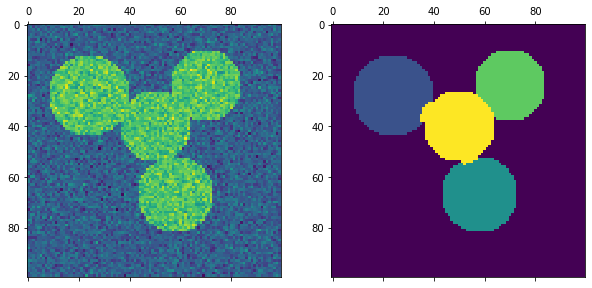

In [5]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

# Tracer deux cercles

Ici, nous répétons le processus ci-dessus, mais ne considérons que les deux premiers cercles que nous avons générés. Notez que cela se traduit par une séparation plus nette entre les cercles car les tailles de région sont plus faciles à équilibrer dans ce cas.

c:\Users\franc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


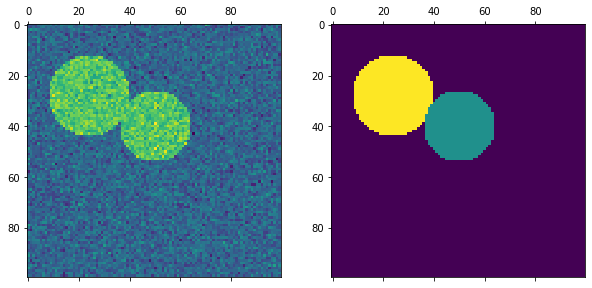

In [6]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()